In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhikjha/utk-face-cropped")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\musti\.cache\kagglehub\datasets\abhikjha\utk-face-cropped\versions\1


In [8]:
import os

folder = os.listdir(path)[0]
folder = os.path.join(path, folder)
print("Folder with path:", folder)
black_women = [image for image in os.listdir(folder) if "26_1_1_" in image]
print("Number of black women:", len(black_women))


# Copy files to a new folder
import shutil
new_folder = "data"
for image in black_women:
    src = os.path.join(folder, image)
    dst = os.path.join(new_folder, image)
    shutil.copy(src, dst)

Folder with path: C:\Users\musti\.cache\kagglehub\datasets\abhikjha\utk-face-cropped\versions\1\utkcropped
Number of black women: 355


In [ ]:
import hashlib
hashes = {}
for image in os.listdir(new_folder):
    with open(os.path.join(new_folder, image), "rb") as f:
        file_hash = hashlib.md5(f.read()).hexdigest()
    if file_hash in hashes:
        os.remove(os.path.join(new_folder, image))
    else:
        hashes[file_hash] = image  

print("Number of unique images:", len(os.listdir(new_folder)))


Number of unique images: 340


In [ ]:
black_women = os.listdir(new_folder)
ratings = dict([(image, (0,0)) for image in black_women])
from IPython.display import Image, display
num_images = len(ratings)
current_image = 0
deleted = 0
rated_images =[]
with open("new.txt", "r") as f:
    for line in f:
        image, rating1, rating2 = line.strip().split(", ")
        rated_images.append(image)
        current_image += 1
        if rating1 == "-1" or rating2 == "-1":
            deleted += 1

for image in ratings.keys():
    if image in rated_images:
        continue
    display(Image(filename=os.path.join(new_folder, image)))
    rating1 = input(f"user 1, Rate the happiness of the person in {image} (1-5): ")
    rating2 = input(f"user 2, Rate the happiness of the person in {image} (1-5): ")

    ratings[image] = (int(rating1), int(rating2))
    current_image += 1
    with open("new.txt", "a") as f:
        f.write(f"{image}, {rating1}, {rating2}\n")
    print(f"Progress: {current_image}/{num_images} images rated.")
    if rating1 == "-1" or rating2 == "-1":
        deleted += 1
        print(f"Total deleted: {deleted}")


    



In [26]:
# delete images with rating -1
to_delete = [image for image, (r1,r2) in ratings.items() if r1 == -1 or r2 == -1]
for image in to_delete:
    os.remove(os.path.join(new_folder, image))
#remove -1 lines from new.txt 
with open("new.txt", "r") as f:
    lines = f.readlines()

filtered_lines = []
for line in lines:
    parts = line.strip().split(", ")
    if len(parts) == 3:
        image, rating1, rating2 = parts
        if rating1 != "-1" and rating2 != "-1" and rating1>= "1" and rating1 <= "5" and rating2 >= "1" and rating2 <= "5":
            filtered_lines.append(line)

# Write the filtered lines back to the file
with open("newfiltered.txt", "w") as f:
    f.writelines(filtered_lines)

print(f"Removed lines with -1 ratings. {len(filtered_lines)} lines remaining in new.txt")
print("Number of images after deletion:", len(os.listdir(new_folder)))
ratings = {image: (r1,r2) for image, (r1,r2) in ratings.items() if r1 != -1 and r2 != -1}
print("Number of ratings after deletion:", len(ratings))


Removed lines with -1 ratings. 280 lines remaining in new.txt
Number of images after deletion: 306
Number of ratings after deletion: 306


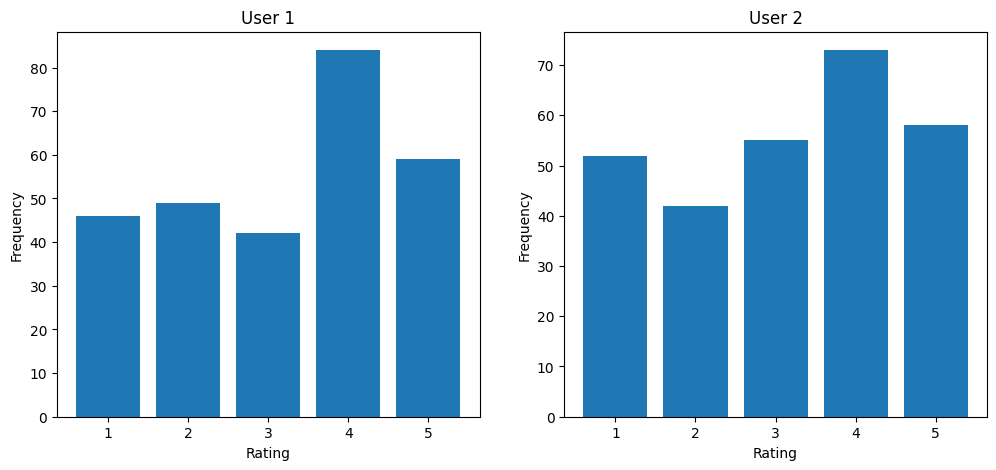

In [ ]:
ratings1 = []
ratings2 = []

with open("newfiltered.txt", "r") as f:
    for line in f:
        image, rating1,rating2 = line.strip().split(", ")
        ratings1.append((image, int(rating1)))
        ratings2.append((image, int(rating2)))

# frequency of each rating
from collections import Counter
rating_counts1 = Counter([rating for image, rating in ratings1])
rating_counts2 = Counter([rating for image, rating in ratings2])

# histogram
import matplotlib.pyplot as plt
fig , axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(rating_counts1.keys(), rating_counts1.values())
axs[0].set_title('User 1')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[1].bar(rating_counts2.keys(), rating_counts2.values())
axs[1].set_title('User 2')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')
plt.show()
# user 1 Anka user 2 mustafa
# rember to clean data 
